# <font color='Yellow'>XGBoost </font> <font color='pink'> Classifier </font>

## Necessary imports

In [15]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import utils
import importlib
importlib.reload(utils)
from utils import evaluate_model, oversample_dataset, draw_parameter_validation_curve
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [16]:
DATASET_DIR = '../../Dataset/body_level_classification_train.csv'
df = pd.read_csv(DATASET_DIR)

## Explore Data

In [17]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [18]:
print("Number of samples: ", len(df))
print("Number of features: ", len(df.columns) - 1)
print("Number of classes: ", len(df['Body_Level'].unique()))
print(df['Body_Level'].value_counts())

Number of samples:  1477
Number of features:  16
Number of classes:  4
Body Level 4    680
Body Level 3    406
Body Level 2    201
Body Level 1    190
Name: Body_Level, dtype: int64


In [19]:
print("Number of missings: ", df.isnull().sum().sum())

Number of missings:  0


## Let's Prepare the Data for the model

### Convert categorical values to numerical values

In [20]:
le = LabelEncoder()
for col in df.columns:
    # check if the column contains string values
    if df[col].dtype == 'object':
        # fit the LabelEncoder to the column and transform the values
        df[col] = le.fit_transform(df[col])


df['Body_Level'].value_counts()

3    680
2    406
1    201
0    190
Name: Body_Level, dtype: int64

### Let's add new synthetic features 🙈

Body Mass Index (BMI) 📏

In [21]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

### Let's Split the Data

In [22]:
X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Let's make the a balanced version of the dataset ⚖️

In [23]:
df_over = oversample_dataset(df)

X_over = df_over.drop('Body_Level', axis=1)
y_over = df_over['Body_Level']

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.1, random_state=42)

## XGBoost Classifier <font color='pink'>Trial 1</font>

In [24]:
params1 = {
    'max_depth': 3,
    'eta': 0.15,
    'objective': 'multi:softprob',
    'num_class': 4
}

model1 = XGBClassifier(**params1)
model1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=4, num_parallel_tree=None, ...)

Accuracy:  1.0
F1 score:  1.0
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        82
           3       1.00      1.00      1.00       138

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



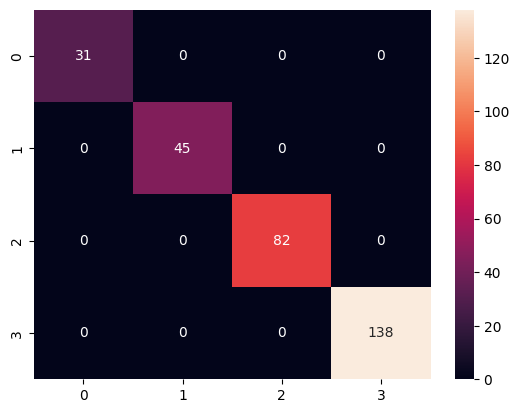

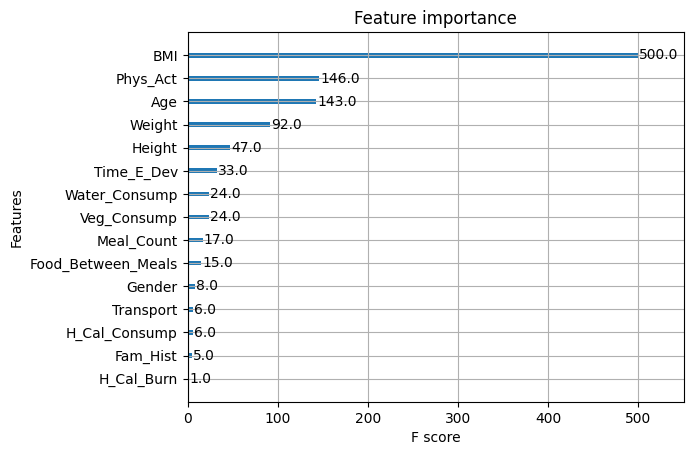

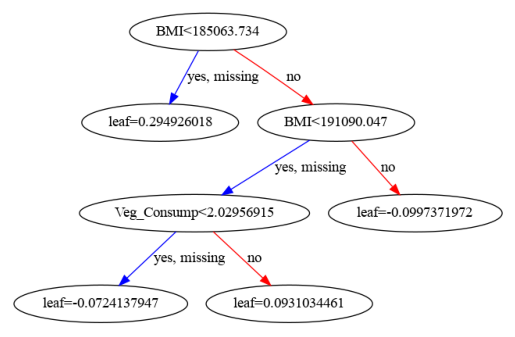

In [25]:
evaluate_model(model1, X_test, y_test)

In [26]:
# save the model in .pkl file
import pickle
pickle.dump(model1, open("xgboost_model.pkl", "wb"))


In [27]:
# save X_test and y_test
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


## XGBoost Classifier <font color='pink'>Trial 2</font>

#### This trial we study the effect of the oversampling technique on the model performance

In [28]:
params2 = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': 4
}

model2 = XGBClassifier(**params1)
model2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.15, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=4, num_parallel_tree=None, ...)

Accuracy:  0.9963235294117647
F1 score:  0.9962993197278912
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       0.99      1.00      0.99        73
           2       1.00      0.98      0.99        63
           3       1.00      1.00      1.00        67

    accuracy                           1.00       272
   macro avg       1.00      1.00      1.00       272
weighted avg       1.00      1.00      1.00       272



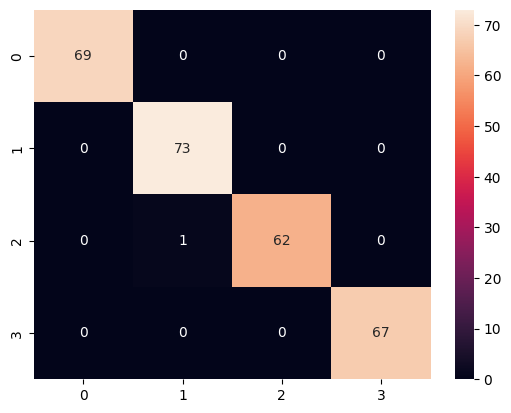

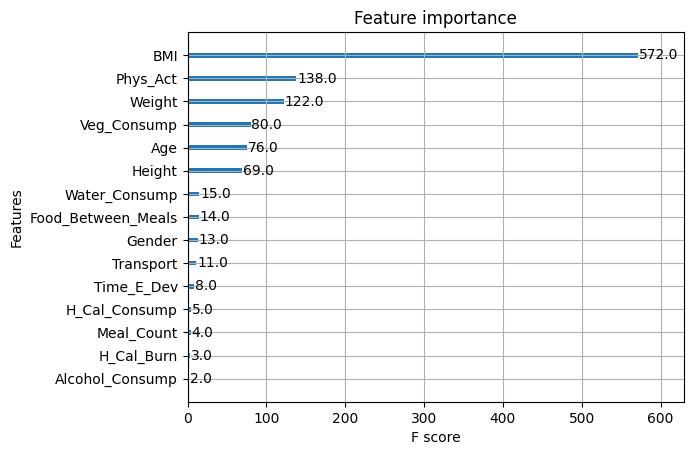

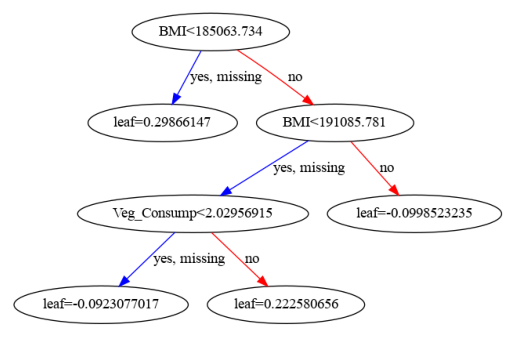

In [29]:
evaluate_model(model2, X_test_over, y_test_over)

## XGBoost Classifier <font color='pink'> Learning Curves ⤴️</font>

In [30]:
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softprob',
    'num_class': 4
}
model = XGBClassifier(**params)

### Validation Curve of <font color='pink'>learning rate</font>

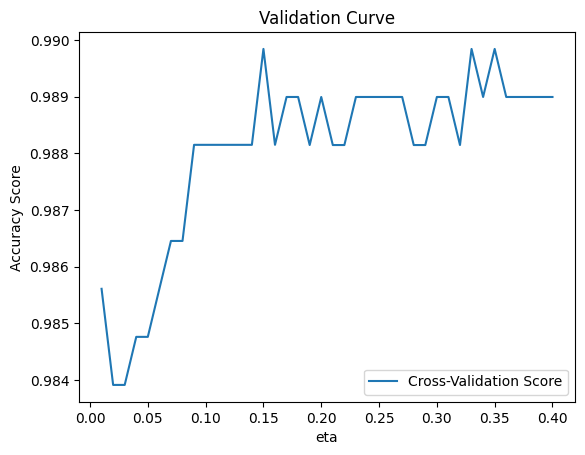

In [31]:
draw_parameter_validation_curve(model, param_name = 'eta', param_range = np.linspace(0.01, 0.4, 40) , X_train = X_train, y_train = y_train, cv = 5)

### Validation Curve of <font color='pink'>max depth</font>

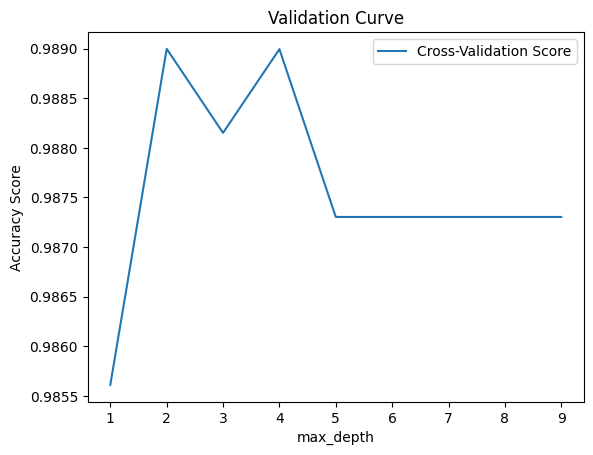

In [32]:
draw_parameter_validation_curve(model, param_name = 'max_depth', param_range = np.arange(1, 10) , X_train = X_train, y_train = y_train, cv = 5)

## XGBoost Classifier <font color='pink'> Grid Search</font>

In [33]:
from sklearn.model_selection import GridSearchCV

model3 = XGBClassifier()

param_grid = {
    'learning_rate': [0.4, 0.45, 0.3, 0.2, 0.1, 0.01, 0.001],
    'max_depth': [2, 3, 6, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 150]
}

grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

evaluate_model(grid_search, X_test, y_test)